In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn

In [ ]:
data = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
X = data.iloc[:,1:785]
labels = data.iloc[:,0]
X.max().max()

255

5


<function matplotlib.pyplot.show(close=None, block=None)>

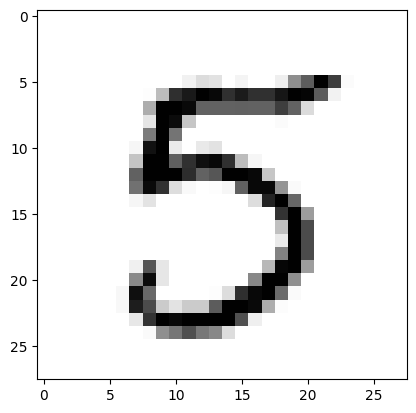

In [ ]:
print(labels.iloc[1])
img = X.iloc[1].values
plt.imshow(img.reshape(28,28), cmap = plt.cm.Greys)
plt.show
# train the network from the pixels to recognize that this is a #

In [ ]:
def activation(x):
  act = 1/(1 + np.exp(-x))
  return act

def d_activation(x):
  d_act = x * (1 - x)
  return d_act

In [ ]:
# crude copy 
data = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
X = data.iloc[:,1:785]
X = X/255
N = len(X)
ones = np.ones((1,N))
Xp = np.concatenate((ones.T, X), axis=1)

labels = data.iloc[:,0]
y = pd.get_dummies(labels)
y = y.values

np.random.seed(0)
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
wih = 2 * np.random.rand(hidden_nodes,input_nodes + 1) - 1
who = 2 * np.random.rand(output_nodes,hidden_nodes + 1) - 1

epochs = 100
learning_rate = 1.
for epoch in range(epochs):
  # forward propagation
  Xih = wih @ Xp.T
  yh = activation(Xih)
  yh = np.concatenate((ones, yh))
  Xho = who @ yh
  y_predicted = activation(Xho)
  
  # backpropagation
  error = y.T - y_predicted
  error_hidden = (error * d_activation(y_predicted)).T @ who[:,1:]

  gradient_ho = -(1/N) * (error * d_activation(y_predicted)) @ yh.T
  gradient_ih = -(1/N) * (error_hidden.T * d_activation(yh[1:,:])) @ Xp

  who = who - learning_rate * gradient_ho
  wih = wih - learning_rate * gradient_ih
  
  if epoch%(epochs/10) == 0:
    L2 = 0.5*np.mean(error**2)
    print(epoch,L2)

labels_predicted = np.argmax(y_predicted, axis = 0)
np.sum(labels_predicted == labels)/N

0 0.18765582643999357
10 0.047871375779281834
20 0.04645446363278402
30 0.04566180998701434
40 0.044907698300565
50 0.04405283775164149
60 0.04315709519477765
70 0.04232430720786801
80 0.04159196490013156
90 0.040957836833250355


0.3051

In [ ]:
# batching data
data = pd.read_csv('sample_data/mnist_train_small.csv', header=None)

batch_size = 2000
N = len(data)
batches = []
for batch_no, batch in data.groupby(np.arange(N)//batch_size):
  print(batch_no, batch)
  X = batch.iloc[:,1:785]
  X = X/255
  N = len(X)
  ones = np.ones((1,N))
  Xp = np.concatenate((ones.T, X), axis=1)

  labels = batch.iloc[:,0]
  y = pd.get_dummies(labels)
  y = y.values

  batches.append((Xp, y))

In [ ]:
# batching copy
np.random.seed(0)
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
wih = 2 * np.random.rand(hidden_nodes,input_nodes + 1) - 1
who = 2 * np.random.rand(output_nodes,hidden_nodes + 1) - 1

epochs = 100
learning_rate = 1.
for epoch in range(epochs):
  for Xp, y in batches:
    # forward propagation
    N = len(Xp)
    ones = np.ones((1, N))
    Xih = wih @ Xp.T
    yh = activation(Xih)
    yh = np.concatenate((ones, yh))
    Xho = who @ yh
    y_predicted = activation(Xho)

    # backpropagation
    error = y.T - y_predicted
    error_hidden = (error * d_activation(y_predicted)).T @ who[:,1:]

    gradient_ho = -(1/N) * (error * d_activation(y_predicted)) @ yh.T
    gradient_ih = -(1/N) * (error_hidden.T * d_activation(yh[1:,:])) @ Xp

    who = who - learning_rate * gradient_ho
    wih = wih - learning_rate * gradient_ih
  
  if epoch%(epochs/10) == 0:
    L2 = 0.5*np.mean(error**2)
    print(epoch,L2)

X = data.iloc[:,1:785]
X = X/255
N = len(X)
ones = np.ones((1,N))
Xp = np.concatenate((ones.T, X), axis=1)

labels = data.iloc[:,0]
y = pd.get_dummies(labels)
y = y.values

Xih = wih @ Xp.T
yh = activation(Xih)
yh = np.concatenate((ones, yh))
Xho = who @ yh
y_predicted = activation(Xho)

labels_predicted = np.argmax(y_predicted, axis = 0)
np.sum(labels_predicted == labels)/N

0 0.04787745618162007
10 0.03999599642053147
20 0.03553967247303741
30 0.02862532820192065
40 0.020984794985818116
50 0.017477262098760465
60 0.01553606136694034
70 0.014282802817071586
80 0.013383649907816358
90 0.012686674529126423


0.8649